In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import random

In [16]:
def generate_maze(size):
    base = np.zeros((size,size))
    base[:,0] = 1
    base[0,:] = 1
    base[-1,:] = 1
    base[:,-1] = 1
    return base

In [153]:
def choose_random_square_from_maze(maze):
    x, y = random.randint(1, maze.shape[0]-2),random.randint(1, maze.shape[0]-2)
    return [x,y]

In [47]:
def add_random_exit(maze):
    x, y = choose_random_square_from_maze(maze)
    maze[x, y] = 2
    return maze

In [50]:
def add_robot(maze):
    x, y = choose_random_square_from_maze(maze)

    maze[x, y] = 3
    return maze

In [54]:
def setup(mazeSize):
    maze = generate_maze(mazeSize)
    maze = add_random_exit(maze)
    maze = add_robot(maze)
    return maze

In [110]:
def display_maze(maze):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.pcolor(maze)
    plt.show(block=False)
    for i in range(10):
        sleep(1)
        plt.close()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.pcolor(setup(3))
        plt.show(block=False)

In [113]:
directions = ["left", "right", "up", "down"]

In [ ]:
def setup(mazeSize):
    maze = Maze(mazeSize):
    maze[x,y] = 3

In [267]:
class RoboBat:
    
    def __init__(self, maze, pos):
        self.pos = pos
        self.maze = maze
        self.maze.maze[pos[0], pos[1]] = 3
        self.finished = False
        
    def distance_to_object(self, direction):
        return 0
        
    def move_in_direction(self, direction):
        newPos = point_in_direction(self.pos, direction)
        print(newPos)
        newPosValue = self.maze.value_at_point(newPos)
        print(newPosValue)
        try:
            if newPosValue == 2:
                self.finished = True            
            elif newPosValue != 1:
                self.maze[self.pos[0], self.pos[1]] = 0
                self.maze[newPos[0], newPos[1]] = 3
                return True
            else:
                return False
        except:
            return False

In [263]:
class Maze:
    
    def __init__(self,size):
        self.maze = generate_maze(size)
        self.exitPos = choose_random_square_from_maze(self.maze)
        self.maze[self.exitPos[0], self.exitPos[1]] = 2
    
    def value_at_point(self, position):
        return self.maze[position[0], position[1]]
            
    def display(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.pcolor(self.maze)
        plt.show(block=False)

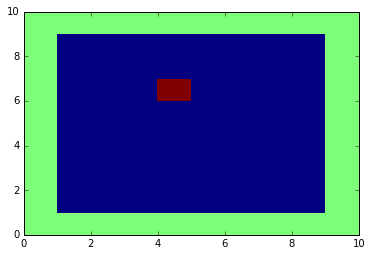

In [264]:
maze = Maze(10)
maze.display()

In [265]:
maze.is_solved()
maze.move("up")

AttributeError: 'Maze' object has no attribute 'is_solved'

In [260]:
def basic_solver(robot, maze):
    counter = 0
    finished = robot.finished
    while not finished:
        randomDirection = random.choice(directions)
        robot.move_in_direction(randomDirection)
        isSolved = robot.finished
        counter += 1
        
    maze.display()
    return counter

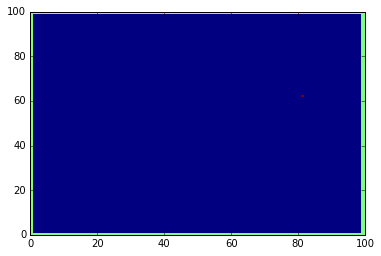

[84, 91]
0.0
[83, 90]
0.0
[84, 89]
0.0
[83, 90]
0.0
[85, 90]
0.0
[84, 91]
0.0
[83, 90]
0.0
[83, 90]
0.0
[84, 91]
0.0
[85, 90]
0.0
[84, 89]
0.0
[84, 89]
0.0
[84, 89]
0.0
[84, 91]
0.0
[84, 89]
0.0
[84, 89]
0.0
[84, 91]
0.0
[84, 91]
0.0
[85, 90]
0.0
[85, 90]
0.0
[84, 91]
0.0
[85, 90]
0.0
[85, 90]
0.0
[84, 91]
0.0
[85, 90]
0.0
[84, 91]
0.0
[84, 91]
0.0
[83, 90]
0.0
[84, 91]
0.0
[84, 91]
0.0
[84, 91]
0.0
[83, 90]
0.0
[84, 89]
0.0
[83, 90]
0.0
[84, 89]
0.0
[85, 90]
0.0
[85, 90]
0.0
[85, 90]
0.0
[85, 90]
0.0
[85, 90]
0.0
[84, 91]
0.0
[84, 89]
0.0
[84, 91]
0.0
[84, 89]
0.0
[84, 91]
0.0
[84, 89]
0.0
[84, 89]
0.0
[83, 90]
0.0
[84, 91]
0.0
[84, 89]
0.0
[84, 91]
0.0
[84, 89]
0.0
[83, 90]
0.0
[84, 91]
0.0
[85, 90]
0.0
[85, 90]
0.0
[85, 90]
0.0
[84, 91]
0.0
[85, 90]
0.0
[84, 91]
0.0
[85, 90]
0.0
[84, 89]
0.0
[84, 91]
0.0
[85, 90]
0.0
[85, 90]
0.0
[85, 90]
0.0
[83, 90]
0.0
[84, 91]
0.0
[83, 90]
0.0
[85, 90]
0.0
[84, 89]
0.0
[84, 91]
0.0
[85, 90]
0.0
[84, 91]
0.0
[83, 90]
0.0
[83, 90]
0.0
[84, 91]
0.0

KeyboardInterrupt: 

In [268]:
maze = Maze(100)
maze.display()
x, y = choose_random_square_from_maze(maze.maze)
while maze.maze[x,y] != 0:
    x, y = choose_random_square_from_maze(maze.maze)
robot = RoboBat(maze,[x,y])
basic_solver(robot,maze)

In [233]:
def point_in_direction(position, direction):
    if direction == "down":
        return [position[0] - 1 , position[1]]
    if direction == "up":
        return [position[0] + 1 , position[1]]
    if direction == "right":
        return [position[0], position[1] + 1]
    if direction == "left":
        return [position[0], position[1] - 1]

In [238]:
class CentralBrain:
    
    def __init__(self, size):
        self.maze = np.zeros((size,size))
        
    def submit_view(self, position, direction, length):
        self.maze[position[0], position[1]] = 3
        for _ in range(length):
            position = point_in_direction(position, direction)
            self.maze[position[0], position[1]] = 1
            
    def display(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.pcolor(self.maze)
        plt.show(block=False)

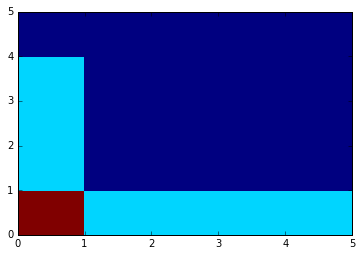

In [241]:
brain = CentralBrain(5)
brain.submit_view([0,0], "up", 3)
brain.submit_view([0,0], "right", 4)
brain.display()